In [49]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [50]:
chicago = pd.read_csv(("Chicago_Traffic_Crashes_-_Crashes.csv"))

C:\Users\ilang\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358035 entries, 0 to 358034
Data columns (total 48 columns):
RD_NO                            358035 non-null object
CRASH_DATE_EST_I                 26674 non-null object
CRASH_DATE                       358035 non-null object
POSTED_SPEED_LIMIT               358035 non-null int64
TRAFFIC_CONTROL_DEVICE           358035 non-null object
DEVICE_CONDITION                 358035 non-null object
WEATHER_CONDITION                358035 non-null object
LIGHTING_CONDITION               358035 non-null object
FIRST_CRASH_TYPE                 358035 non-null object
TRAFFICWAY_TYPE                  358035 non-null object
LANE_CNT                         198545 non-null object
ALIGNMENT                        358035 non-null object
ROADWAY_SURFACE_COND             358035 non-null object
ROAD_DEFECT                      358035 non-null object
REPORT_TYPE                      349860 non-null object
CRASH_TYPE                       358035 non-null ob

# Basic Exploration

In [52]:
chicago.CRASH_TYPE.value_counts()

NO INJURY / DRIVE AWAY              277114
INJURY AND / OR TOW DUE TO CRASH     80921
Name: CRASH_TYPE, dtype: int64

In [53]:
chicago.DAMAGE.value_counts()

OVER $1,500      201348
$501 - $1,500    108499
$500 OR LESS      48188
Name: DAMAGE, dtype: int64

In [54]:
chicago.ROADWAY_SURFACE_COND.value_counts()

DRY                268289
WET                 50234
UNKNOWN             23392
SNOW OR SLUSH       12406
ICE                  2696
OTHER                 840
SAND, MUD, DIRT       178
Name: ROADWAY_SURFACE_COND, dtype: int64

In [55]:
chicago.WEATHER_CONDITION.value_counts()

CLEAR                     283026
RAIN                       33500
UNKNOWN                    15400
SNOW                       12680
CLOUDY/OVERCAST            10829
OTHER                       1120
FOG/SMOKE/HAZE               673
SLEET/HAIL                   582
FREEZING RAIN/DRIZZLE        136
SEVERE CROSS WIND GATE        77
BLOWING SNOW                  12
Name: WEATHER_CONDITION, dtype: int64

In [56]:
chicago.WORK_ZONE_I.value_counts()

Y    2052
N     527
Name: WORK_ZONE_I, dtype: int64

In [57]:
chicago.WORK_ZONE_TYPE.value_counts()

CONSTRUCTION    1466
UNKNOWN          269
MAINTENANCE      202
UTILITY          115
Name: WORK_ZONE_TYPE, dtype: int64

In [58]:
chicago.WORKERS_PRESENT_I.value_counts()

Y    540
N     60
Name: WORKERS_PRESENT_I, dtype: int64

In [59]:
chicago.columns

Index(['RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE

# Data Cleaning

**Columns Dropped** - included administrative police notes, Lat/Long Location, and other features where the majority of values were **Nan**

**NaN Values**  - DOORING_I, if an accident didn't involving opening a door into a bicyclist, then the value should be NO rather than NaN, and was converted.  Applied this to several other columns where NaN should be No.  For numerical columns, NaN was changed to **0**  

**Outliers** - Included POSTED_SPEED_LIMIT, where values did not match Chicago speed limits of 15/20/25/35/45/55/65/70.  Values were changed to the nearest speed limit.  


In [60]:
to_drop = ['RD_NO', 
           'CRASH_DATE_EST_I',
           'REPORT_TYPE', 
           'DATE_POLICE_NOTIFIED',
           'DATE_POLICE_NOTIFIED', 
           'PHOTOS_TAKEN_I', 
           'STATEMENTS_TAKEN_I', 
           'LATITUDE',
           'LONGITUDE', 
           'LOCATION', 
           'WORK_ZONE_I', 
           'WORK_ZONE_TYPE', 
           'WORKERS_PRESENT_I', 
           'LANE_CNT', 
           'INJURIES_UNKNOWN',
        'NOT_RIGHT_OF_WAY_I',
           'HIT_AND_RUN_I'

]

chicago.drop(to_drop, inplace=True, axis=1)



In [61]:
chicago.POSTED_SPEED_LIMIT.unique()

array([45, 30, 25, 20, 10, 35, 15, 40,  0,  5, 55, 39,  9,  6,  3,  1, 50,
       60, 99, 65, 38, 18, 32,  2, 33, 12,  7, 63, 16, 34, 26,  4, 24, 23,
       70, 36, 22, 14, 11], dtype=int64)

In [62]:
chicago.POSTED_SPEED_LIMIT.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], 15, inplace=True) 
#Replacing all speed limit values <15 miles with 15

In [63]:
chicago.POSTED_SPEED_LIMIT.replace([16,18], 20, inplace=True)
chicago.POSTED_SPEED_LIMIT.replace([22,23,24], 25, inplace=True)
chicago.POSTED_SPEED_LIMIT.replace([26], 30, inplace=True)
chicago.POSTED_SPEED_LIMIT.replace([32,33,34], 35, inplace=True)
chicago.POSTED_SPEED_LIMIT.replace([36,38,39,40], 45, inplace=True)
chicago.POSTED_SPEED_LIMIT.replace([16,18], 20, inplace=True)
chicago.POSTED_SPEED_LIMIT.replace([50], 55, inplace=True)
chicago.POSTED_SPEED_LIMIT.replace([16,18], 20, inplace=True)
chicago.POSTED_SPEED_LIMIT.replace([60,63], 65, inplace=True)
chicago.POSTED_SPEED_LIMIT.replace([99], 70, inplace=True)

In [64]:
chicago.POSTED_SPEED_LIMIT.value_counts()

30    264421
15     28699
35     24293
25     21242
20     13508
45      5367
55       406
70        69
65        30
Name: POSTED_SPEED_LIMIT, dtype: int64

In [65]:
chicago.isnull().sum()*100/chicago.isnull().count()

CRASH_DATE                        0.000000
POSTED_SPEED_LIMIT                0.000000
TRAFFIC_CONTROL_DEVICE            0.000000
DEVICE_CONDITION                  0.000000
WEATHER_CONDITION                 0.000000
LIGHTING_CONDITION                0.000000
FIRST_CRASH_TYPE                  0.000000
TRAFFICWAY_TYPE                   0.000000
ALIGNMENT                         0.000000
ROADWAY_SURFACE_COND              0.000000
ROAD_DEFECT                       0.000000
CRASH_TYPE                        0.000000
INTERSECTION_RELATED_I           78.038739
DAMAGE                            0.000000
PRIM_CONTRIBUTORY_CAUSE           0.000000
SEC_CONTRIBUTORY_CAUSE            0.000000
STREET_NO                         0.000000
STREET_DIRECTION                  0.000559
STREET_NAME                       0.000279
BEAT_OF_OCCURRENCE                0.001117
DOORING_I                        99.655341
NUM_UNITS                         0.352759
MOST_SEVERE_INJURY                0.554694
INJURIES_TO

In [66]:
chicago.DOORING_I.replace(np.nan, 'N', inplace=True) 
chicago.INTERSECTION_RELATED_I.replace(np.nan, 'N', inplace=True)
chicago.INJURIES_FATAL.replace(np.nan, 0, inplace=True)
chicago.INJURIES_TOTAL.replace(np.nan, 0, inplace=True)
chicago.INJURIES_INCAPACITATING.replace(np.nan, 0, inplace=True)
chicago.INJURIES_NON_INCAPACITATING.replace(np.nan, 0, inplace=True)
chicago.INJURIES_REPORTED_NOT_EVIDENT.replace(np.nan, 0, inplace=True)
chicago.INJURIES_NO_INDICATION.replace(np.nan, 0, inplace=True)
chicago.NUM_UNITS.replace(np.nan, 0, inplace=True)

## Now that data has been cleaned and features have been dropped, I added:

**IS FATAL** - Will tell the readers if a specific crash led to a fatality, this is a binary feature

**IS COSTLY** - Accidents that cost over $1,500 are considered **Costly**, and this binary feature will be our **Target Variable** .  

The ration of Costly:Not Costly is 56:44, so the class is fairly **balanced**

In [67]:
#chicago.INJURIES_FATAL.unique()

# SVM Classifier.  
#Fatal or Not?  column.  

chicago["IS_FATAL"] = np.where(chicago.INJURIES_FATAL > 0, 1, 0)

chicago["IS_COSTLY"] = np.where(chicago.DAMAGE != 'OVER $1,500', 0, 1 )

In [68]:
chicago.head(1)

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,INTERSECTION_RELATED_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,DOORING_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,IS_FATAL,IS_COSTLY
0,7/4/2019 22:33,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,N,"OVER $1,500",FOLLOWING TOO CLOSELY,NOT APPLICABLE,300,N,LAKE SHORE DR SB,114.0,N,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,22,5,7,0,1


In [69]:
#Note the improvement in NaN value reduction
chicago.isnull().sum()*100/chicago.isnull().count()

CRASH_DATE                       0.000000
POSTED_SPEED_LIMIT               0.000000
TRAFFIC_CONTROL_DEVICE           0.000000
DEVICE_CONDITION                 0.000000
WEATHER_CONDITION                0.000000
LIGHTING_CONDITION               0.000000
FIRST_CRASH_TYPE                 0.000000
TRAFFICWAY_TYPE                  0.000000
ALIGNMENT                        0.000000
ROADWAY_SURFACE_COND             0.000000
ROAD_DEFECT                      0.000000
CRASH_TYPE                       0.000000
INTERSECTION_RELATED_I           0.000000
DAMAGE                           0.000000
PRIM_CONTRIBUTORY_CAUSE          0.000000
SEC_CONTRIBUTORY_CAUSE           0.000000
STREET_NO                        0.000000
STREET_DIRECTION                 0.000559
STREET_NAME                      0.000279
BEAT_OF_OCCURRENCE               0.001117
DOORING_I                        0.000000
NUM_UNITS                        0.000000
MOST_SEVERE_INJURY               0.554694
INJURIES_TOTAL                   0

In [70]:
#chicago.DAMAGE.value_counts()
chicago.CRASH_MONTH.value_counts()

10    38004
9     34946
8     32640
7     30982
5     30262
6     30254
11    29749
12    27546
3     27016
4     26942
1     25742
2     23952
Name: CRASH_MONTH, dtype: int64


# Third: Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power and experiment with both.

In [71]:
##What models should I consider? Start with Naive Bayes since I'm only doing classification

#Model evaluation techniques? 
#confusion matrix, precision, recall, false positives, true negatives, 

#What is explanatory vs predictive?
#Predict if an accident is costly or not
#Explain what contributing factors most likely lead to a costly accident, which categorical deata. 


Next, in order to prepare for your presentation, create a slide deck and 15 minute presentation that guides viewers through your model. Be sure to cover a few specific things:

A specified research question your model addresses
How you chose your model specification and what alternatives you compared it to
The practical uses of your model for an audience of interest
Any weak points or shortcomings of your model

### I chose to get dummy values for the features below:
1. CRASH_TYPE
2. FIRST_CRASH_TYPE


### These features are considered "costly" and could provide value for the model

### Also, I manually created dummy values (changed Y/N to 1/0):
1. INTERSECTION_RELATED_I
2. NOT_RIGHT_OF_WAY_I
3. HIT_AND_RUN_I

 After analyzing Crosstab, I chose to drop **NOT_RIGHT_OF_WAY_I** and **HIT_AND_RUN_I** from the dataset


In [72]:
#count_table = pd.crosstab(student_df["gender"], student_df["race/ethnicity"]) count_table

pd.crosstab(chicago.IS_COSTLY, [chicago.INTERSECTION_RELATED_I], margins=True)
            #chicago.NOT_RIGHT_OF_WAY_I, chicago.HIT_AND_RUN_I])
    #CHECK RATIO 27270/156687:47673/201348  

INTERSECTION_RELATED_I,N,Y,All
IS_COSTLY,,,
0,129417,27270,156687
1,153675,47673,201348
All,283092,74943,358035


In [73]:
27270/156687, 47673/201348  
#Since there is a noticeable difference in ratios for Costly/Not Costly accidents relating to the Intersection, I will keep this feature

(0.17404124145589614, 0.23676917575540854)

In [74]:
chicago.INTERSECTION_RELATED_I.replace('Y', 1, inplace=True)
chicago.INTERSECTION_RELATED_I.replace('N', 0, inplace=True)

In [75]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #I considered label encoding but decided on creating dummies

In [76]:
first_crash_type_dummies = pd.get_dummies(chicago.FIRST_CRASH_TYPE, prefix = 'FIRST_CRASH_TYPE_')

In [77]:
chicago.FIRST_CRASH_TYPE.unique()

array(['REAR END', 'TURNING', 'PARKED MOTOR VEHICLE', 'FIXED OBJECT',
       'SIDESWIPE SAME DIRECTION', 'HEAD ON', 'REAR TO FRONT', 'ANGLE',
       'SIDESWIPE OPPOSITE DIRECTION', 'PEDALCYCLIST', 'PEDESTRIAN',
       'REAR TO SIDE', 'OVERTURNED', 'OTHER OBJECT', 'ANIMAL',
       'REAR TO REAR', 'OTHER NONCOLLISION', 'TRAIN'], dtype=object)

In [78]:
crash_type_dummies = pd.get_dummies(chicago.CRASH_TYPE, prefix = 'CRASH_TYPE_')

In [79]:
crash_type_dummies.head(1)

,CRASH_TYPE__INJURY AND / OR TOW DUE TO CRASH,CRASH_TYPE__NO INJURY / DRIVE AWAY
0,0,1


In [80]:
chicago_final = pd.concat([chicago, first_crash_type_dummies, crash_type_dummies], axis = 1)

In [81]:
chicago_final.columns

Index(['CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'DOORING_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'IS_FATAL', 'IS_COSTLY',
       'FIRST_CRASH_TYPE__ANGLE', 'FIRST_CRASH_TYPE__ANIMAL',
       'FIRST_CRASH_TYPE__FIXED OBJECT', 'FIRST_CRASH_TYPE__HEAD ON',
       'FIRST_CRASH_TYPE__OTHER NONCOLLISION',
       'FIRST_CRASH_TYPE__OTHER OBJECT', 'FIRST_CRASH_TYPE__OVERTURNED',
      

In [82]:
chicago_final = chicago_final.drop(['CRASH_DATE','TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE','DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'DOORING_I','MOST_SEVERE_INJURY', 'INJURIES_TOTAL',
       'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH'],axis = 1)

In [83]:
chicago_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358035 entries, 0 to 358034
Data columns (total 25 columns):
POSTED_SPEED_LIMIT                                358035 non-null int64
INTERSECTION_RELATED_I                            358035 non-null int64
NUM_UNITS                                         358035 non-null float64
IS_FATAL                                          358035 non-null int32
IS_COSTLY                                         358035 non-null int32
FIRST_CRASH_TYPE__ANGLE                           358035 non-null uint8
FIRST_CRASH_TYPE__ANIMAL                          358035 non-null uint8
FIRST_CRASH_TYPE__FIXED OBJECT                    358035 non-null uint8
FIRST_CRASH_TYPE__HEAD ON                         358035 non-null uint8
FIRST_CRASH_TYPE__OTHER NONCOLLISION              358035 non-null uint8
FIRST_CRASH_TYPE__OTHER OBJECT                    358035 non-null uint8
FIRST_CRASH_TYPE__OVERTURNED                      358035 non-null uint8
FIRST_CRASH_TYPE__PARKE

In [183]:
chicago.IS_FATAL.value_counts() #Due to the large imbalance, I chose not to make IS_FATAL the target variable

0    357745
1       290
Name: IS_FATAL, dtype: int64

In [85]:
X = chicago_final.copy()
y = chicago_final.IS_COSTLY
X = X.drop(['IS_COSTLY'],axis=1)

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)  #Set to 75:25 automatically by default

# Now that I have my training data with dummies, I can implement over 
1. Naive Bayes
2. KNN
3. Decision Tree
4. Random Forest

# Naive Bayes




In [87]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix


In [88]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X_train, y_train)

predicted = bnb.predict(X_test)
print("Predicted Value:", predicted)

Predicted Value: [0 0 1 ... 0 1 0]


### Now split the data

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Split dataset into training set and test set
cross_val_score(bnb, X_train, y_train, cv=5)

array([0.58624735, 0.58613563, 0.5827018 , 0.58525277, 0.5868278 ])

In [90]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
predictions = naive_bayes.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score:' , accuracy_score(y_test, predictions))
print('Precision score:' , precision_score(y_test, predictions))
print('Recall score:' , recall_score(y_test, predictions))

Accuracy score: 0.5896613748338156
Precision score: 0.6666585567612282
Recall score: 0.5433579884590216


Text(91.68, 0.5, 'predicted label')

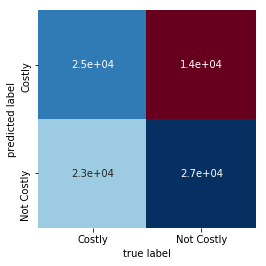

In [92]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['Costly', 'Not Costly'], yticklabels=['Costly', 'Not Costly'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [93]:
confusion_matrix(y_test, predictions)

#TRUE POSITIVES LOWER RIGHT
#TRUE NEGATIVES UPPER LEFT 
#FALSE POSITIVE UPPER RIGHT
#FALSE NEGATIVE LOWER LEFT

array([[25379, 13701],
       [23028, 27401]], dtype=int64)

# K Nearest Neighbors Classifiers


In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [96]:
neighbors = KNeighborsClassifier(n_neighbors=5, n_jobs=-1) #Per stackoverflow, this may reduce time to load

neighbors.fit(X_train,y_train)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
knn.predict(X_test)[0:5]

array([1, 0, 1, 0, 0])

### Play with parameters for KNN, try out n_neighbors = 3 instead

In [98]:
neighbors.predict(X_test)

array([1, 0, 1, ..., 1, 1, 0])

In [99]:
#Do a train test split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#split dataset into train and test data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
#knn.fit(X_train,y_train)

#https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a
#chicago.shape

# Create KNN classifier
#knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([0, 1, 1, 0, 0])

In [100]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.5754281692343787

In [101]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print(np.mean(cv_scores))

[0.57645328 0.57233829 0.57962946 0.58815753 0.59474155]
0.5822640199235727


# Decision Tree

In [102]:
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

In [103]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=6,
    max_depth=5,
    random_state = 99
)


decision_tree.fit(X_train,y_train)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=99, splitter='best')

In [104]:
predictions = decision_tree.predict(X_test)

In [105]:

print('Accuracy score:' , accuracy_score(y_test, predictions))
print('Precision score:' , precision_score(y_test, predictions))
print('Recall score:' , recall_score(y_test, predictions))

Accuracy score: 0.6028890949513457
Precision score: 0.7167404473438956
Recall score: 0.48801284974915227


In [106]:
decision_tree.classes_

array([0, 1])

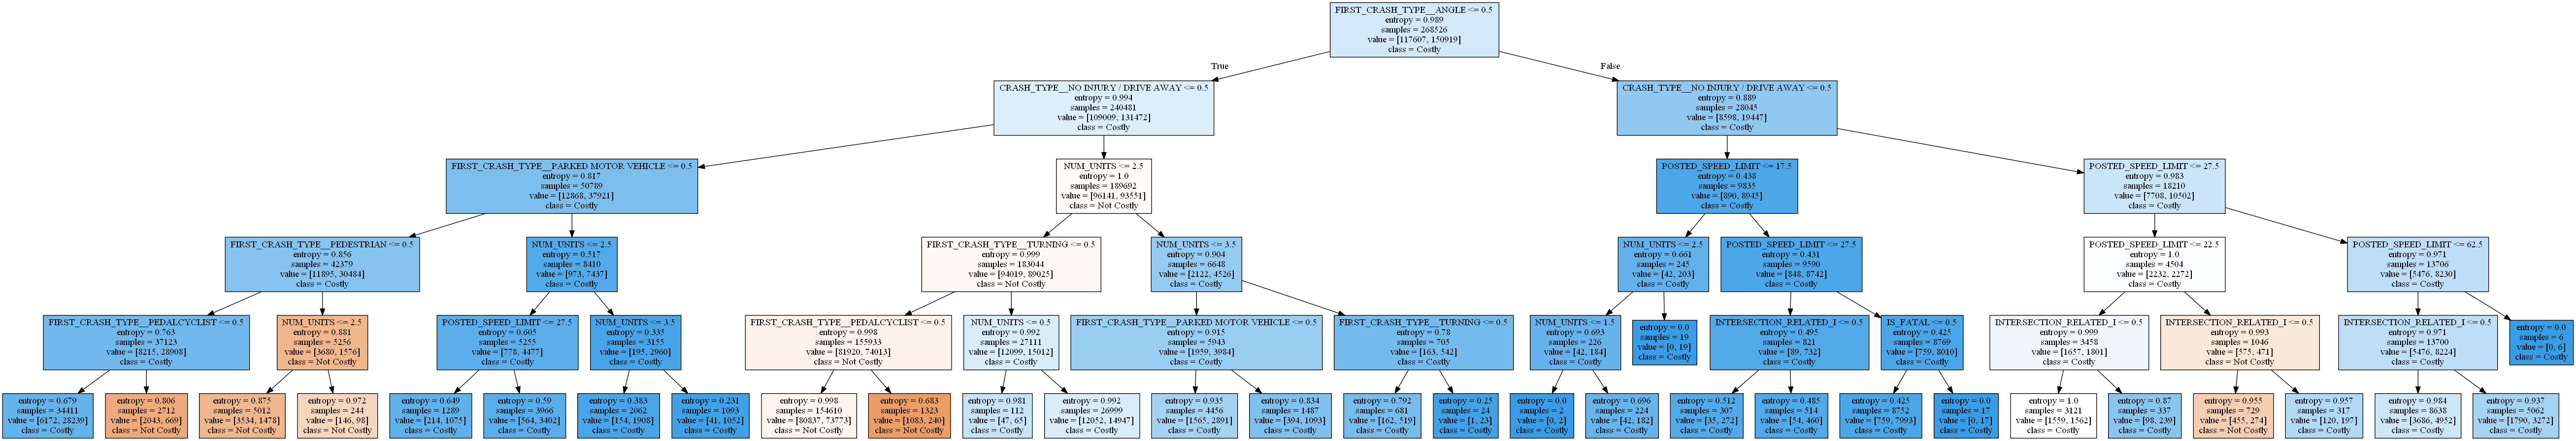

In [107]:
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, 
    out_file=None,
    feature_names = X.columns,    
    class_names= ["Not Costly","Costly"],
    filled=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Random Forest 

In [108]:
from sklearn import ensemble


rfc = ensemble.RandomForestClassifier()

rfc.fit(X_train, y_train)

C:\Users\ilang\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [110]:
cross_val_score(rfc, X, y, cv = 5)

array([0.57137471, 0.60118981, 0.62643317, 0.62264335, 0.61838393])

In [111]:
cross_val_score(rfc, X_test, y_test, cv=5)

array([0.6050162 , 0.60635683, 0.60088258, 0.60060328, 0.60655829])

In [112]:
cross_val_score(rfc, X_test, y_test, cv=10)

array([0.6116635 , 0.59848062, 0.61121662, 0.60317283, 0.6012736 ,
       0.59814546, 0.60607753, 0.6087588 , 0.60674785, 0.61139665])

In [113]:
predictions = rfc.predict(X_test)

In [114]:
print('Accuracy score:' , accuracy_score(y_test, predictions))
print('Precision score:' , precision_score(y_test, predictions))
print('Recall score:' , recall_score(y_test, predictions))

Accuracy score: 0.6074137796199265
Precision score: 0.6967848225088167
Recall score: 0.5367546451446589


In [115]:
rfc.classes_

array([0, 1])

In [165]:
(rfc.predict(X_test)[0:5])


array([0, 0, 1, 0, 0])

In [132]:
rfc.predict([[60, 1, 3, 1, 0, 0, 0, 1,0,0,0,0,0, 0,0,0,0,0,0, 0, 0,0,1,0]])

array([1])

In [138]:
rfc.predict([[60, 1, 1, 1, 0, 0, 0, 1,0,0,0,0,0, 0,0,0,0,0,0, 0, 0,0,0,1]])

array([0])

In [186]:
predictmodel = [[60, 1, 3, 1, 0, 0, 0, 1,0,0,0,0,0, 0,0,0,0,0,0, 0, 0,0,1,0],[60, 1, 1, 1, 0, 0, 0, 1,0,0,0,0,0, 0,0,0,0,0,0, 0, 0,0,0,1]]


In [187]:
for x in predictmodel:
    rfc.predict([x])
    print(rfc.predict([x]))

[1]
[0]


In [168]:
rfc_probs = rfc.predict_proba(X_test)[0:5]

In [169]:
rfc_probs

array([[0.52268541, 0.47731459],
       [0.51791045, 0.48208955],
       [0.07810723, 0.92189277],
       [0.51796869, 0.48203131],
       [0.51033406, 0.48966594]])

In [188]:
confusion_matrix(y_test, predictions)

array([[27301, 11779],
       [23361, 27068]], dtype=int64)

Text(91.68, 0.5, 'predicted label')

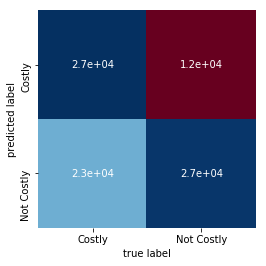

In [237]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['Costly', 'Not Costly'], yticklabels=['Costly', 'Not Costly'])
plt.xlabel('true label')
plt.ylabel('predicted label')

## Tuning Random Forest Model

In [189]:
from pprint import pprint

In [191]:
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [192]:
from sklearn.model_selection import RandomizedSearchCV

In [193]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [198]:
# Extract feature importances
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rfc.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [214]:
fi.feature

22      CRASH_TYPE__INJURY AND / OR TOW DUE TO CRASH
23                CRASH_TYPE__NO INJURY / DRIVE AWAY
13                      FIRST_CRASH_TYPE__PEDESTRIAN
12                    FIRST_CRASH_TYPE__PEDALCYCLIST
2                                          NUM_UNITS
0                                 POSTED_SPEED_LIMIT
4                            FIRST_CRASH_TYPE__ANGLE
14                        FIRST_CRASH_TYPE__REAR END
21                         FIRST_CRASH_TYPE__TURNING
1                             INTERSECTION_RELATED_I
11            FIRST_CRASH_TYPE__PARKED MOTOR VEHICLE
6                     FIRST_CRASH_TYPE__FIXED OBJECT
19        FIRST_CRASH_TYPE__SIDESWIPE SAME DIRECTION
8               FIRST_CRASH_TYPE__OTHER NONCOLLISION
18    FIRST_CRASH_TYPE__SIDESWIPE OPPOSITE DIRECTION
7                          FIRST_CRASH_TYPE__HEAD ON
3                                           IS_FATAL
9                     FIRST_CRASH_TYPE__OTHER OBJECT
15                   FIRST_CRASH_TYPE__REAR TO

In [225]:
rfc = ensemble.RandomForestClassifier(n_estimators=100)

In [226]:
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [227]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [228]:
cross_val_score(rfc, X, y, cv = 5)

array([0.57152832, 0.6017903 , 0.62633541, 0.62290869, 0.61824428])

In [229]:
predictions = rfc.predict(X_test)

In [232]:
rfc = ensemble.RandomForestClassifier(n_estimators=200)

In [233]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [235]:
cross_val_score(rfc, X, y, cv = 20) #Slight improvement

array([0.62430878, 0.57995867, 0.53845724, 0.54448975, 0.56755851,
       0.58297492, 0.62084567, 0.63601832, 0.63326071, 0.61895983,
       0.63225518, 0.62359645, 0.62225574, 0.61711636, 0.62633372,
       0.62650131, 0.61655773, 0.62555165, 0.61566393, 0.61884811])